An illustrative analysis on nytimes data (From O'Reilly's Data Science pg 39,40)

In [1]:
data1 <- read.csv('nyt2.csv')

In [2]:
head(data1)

Age,Gender,Impressions,Clicks,Signed_In
48,1,3,0,1
0,0,9,1,0
15,1,4,0,1
0,0,5,0,0
0,0,7,1,0
0,0,11,0,0


Convert Numeric to factor

In [3]:
?cut

In [4]:
head(data1)

Age,Gender,Impressions,Clicks,Signed_In
48,1,3,0,1
0,0,9,1,0
15,1,4,0,1
0,0,5,0,0
0,0,7,1,0
0,0,11,0,0


Append an entire column to a data frame

In [5]:
data1$agecat <-cut(data1$Age,c(-Inf,0,18,24,34,44,54,64,Inf))

In [12]:
head(data1)

Age,Gender,Impressions,Clicks,Signed_In,agecat
48,1,3,0,1,"(44,54]"
0,0,9,1,0,"(-Inf,0]"
15,1,4,0,1,"(0,18]"
0,0,5,0,0,"(-Inf,0]"
0,0,7,1,0,"(-Inf,0]"
0,0,11,0,0,"(-Inf,0]"


In [7]:
library(doBy)

In [8]:
siterange <- function(x){c(length(x), min(x), mean(x), max(x))}

In [9]:
testFun <- function(x,y){x+y}
z<-testFun(1,2)
z

[1] 3

In [13]:
?summaryBy

In [11]:
summaryBy(Age~agecat, data=data1, FUN=siterange)

agecat,Age.FUN1,Age.FUN2,Age.FUN3,Age.FUN4
"(-Inf,0]",134572,0,0.00000,0
"(0,18]",19135,4,16.01871,18
"(18,24]",34529,19,21.28110,24
"(24,34]",56898,25,29.50074,34
"(34,44]",68974,35,39.51296,44
"(44,54]",63307,45,49.50617,54
"(54,64]",44043,55,59.49751,64
"(64, Inf]",28477,65,72.94104,111


In [14]:
summaryBy(Gender+Signed_In+Impressions+Clicks~agecat,
data =data1)

agecat,Gender.mean,Signed_In.mean,Impressions.mean,Clicks.mean
"(-Inf,0]",0.0000000,0,5.002772,0.14213952
"(0,18]",0.6516854,1,4.998223,0.13441338
"(18,24]",0.5411683,1,4.986214,0.05178256
"(24,34]",0.5410735,1,5.007083,0.05023024
"(34,44]",0.5452779,1,4.987068,0.05101922
"(44,54]",0.5432575,1,4.994392,0.05122656
"(54,64]",0.5434689,1,5.020435,0.10160525
"(64, Inf]",0.3713874,1,4.996207,0.14639885


In [15]:
library(ggplot2)

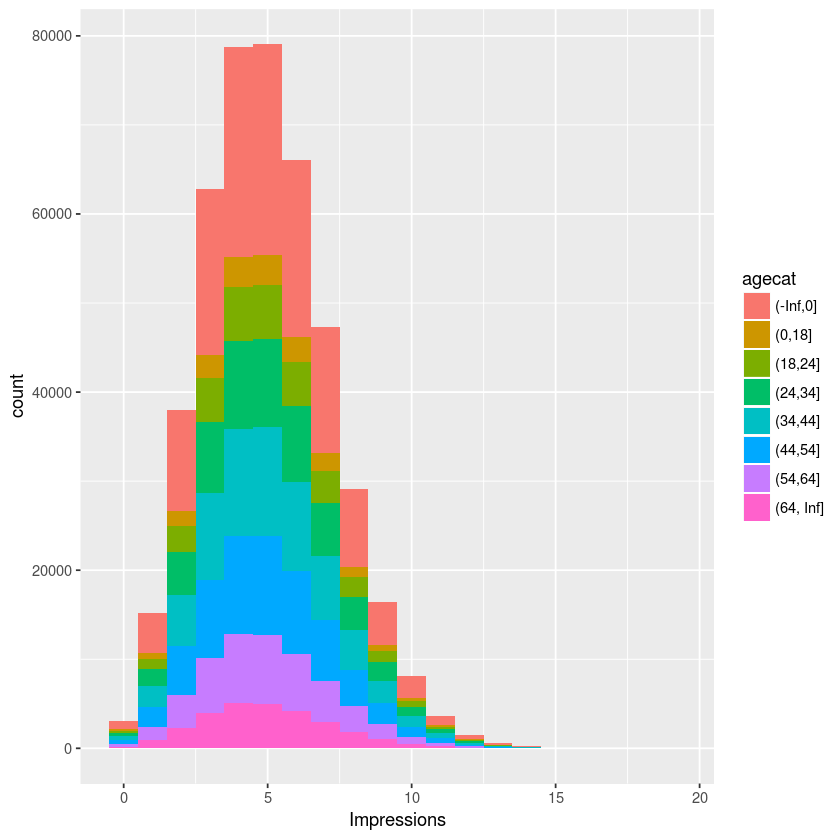

In [17]:
ggplot(data1, aes(x=Impressions, fill=agecat))+geom_histogram(binwidth=1)

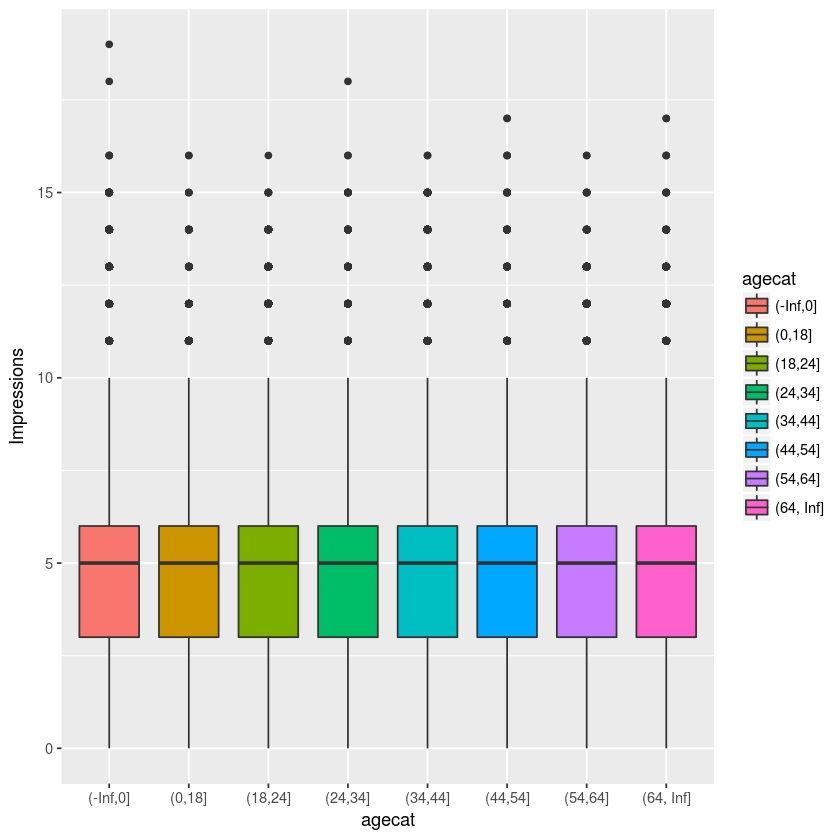

In [21]:
ggplot(data1, aes(x=agecat, y=Impressions, fill=agecat))+geom_boxplot()

In [22]:
data1$hasimps <-cut(data1$Impressions,c(-Inf,0,Inf))

In [23]:
head(data1)

Age,Gender,Impressions,Clicks,Signed_In,agecat,hasimps
48,1,3,0,1,"(44,54]","(0, Inf]"
0,0,9,1,0,"(-Inf,0]","(0, Inf]"
15,1,4,0,1,"(0,18]","(0, Inf]"
0,0,5,0,0,"(-Inf,0]","(0, Inf]"
0,0,7,1,0,"(-Inf,0]","(0, Inf]"
0,0,11,0,0,"(-Inf,0]","(0, Inf]"


In [24]:
summaryBy(Clicks~hasimps, data =data1, FUN=siterange)

hasimps,Clicks.FUN1,Clicks.FUN2,Clicks.FUN3,Clicks.FUN4
"(-Inf,0]",3056,0,0.00000000,0
"(0, Inf]",446879,0,0.09343021,5


In [25]:
nrow(data1)

[1] 449935

In [26]:
?subset

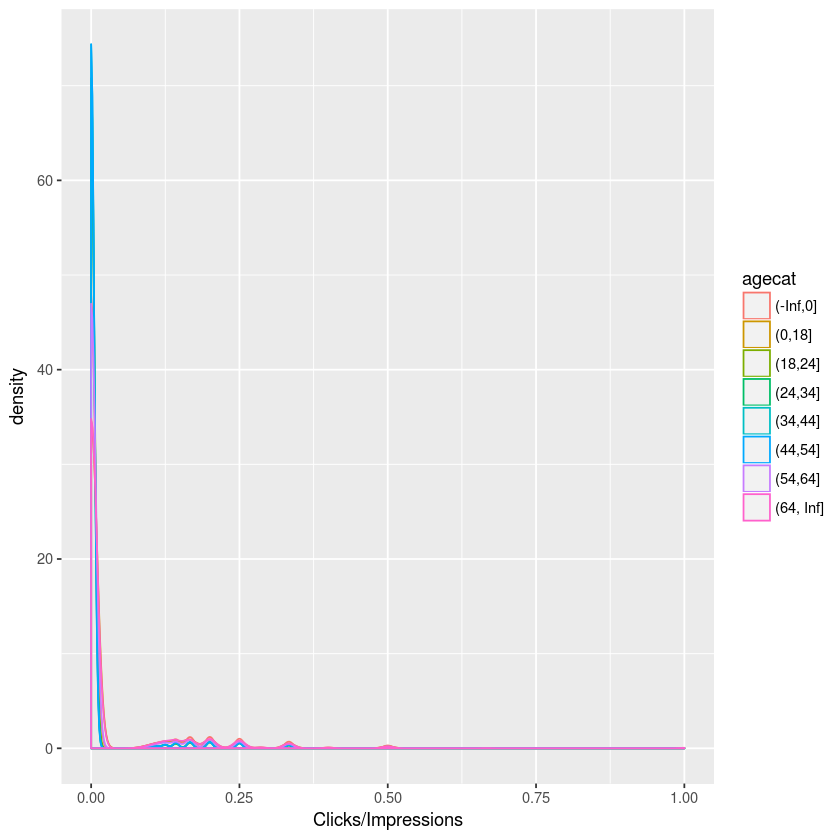

In [27]:
ggplot(subset(data1, Impressions>0), aes(x=Clicks/Impressions,colour=agecat)) + geom_density()

In [30]:
data1$scode[data1$Impressions==0] <- "NoImps"
data1$scode[data1$Impressions >0] <- "Imps"
data1$scode[data1$Clicks >0] <- "Clicks"

In [31]:
head(data1)

Age,Gender,Impressions,Clicks,Signed_In,agecat,hasimps,scode
48,1,3,0,1,"(44,54]","(0, Inf]",Imps
0,0,9,1,0,"(-Inf,0]","(0, Inf]",Clicks
15,1,4,0,1,"(0,18]","(0, Inf]",Imps
0,0,5,0,0,"(-Inf,0]","(0, Inf]",Imps
0,0,7,1,0,"(-Inf,0]","(0, Inf]",Clicks
0,0,11,0,0,"(-Inf,0]","(0, Inf]",Imps


In [32]:
data1$scode <- factor(data1$scode)

In [33]:
head(data1)

Age,Gender,Impressions,Clicks,Signed_In,agecat,hasimps,scode
48,1,3,0,1,"(44,54]","(0, Inf]",Imps
0,0,9,1,0,"(-Inf,0]","(0, Inf]",Clicks
15,1,4,0,1,"(0,18]","(0, Inf]",Imps
0,0,5,0,0,"(-Inf,0]","(0, Inf]",Imps
0,0,7,1,0,"(-Inf,0]","(0, Inf]",Clicks
0,0,11,0,0,"(-Inf,0]","(0, Inf]",Imps


In [34]:
clen <- function(x){c(length(x))}
etable<-summaryBy(Impressions~scode+Gender+agecat,data = data1, FUN=clen)

In [35]:
etable

scode,Gender,agecat,Impressions.clen
Clicks,0,"(-Inf,0]",17530
Clicks,0,"(0,18]",807
Clicks,0,"(18,24]",791
Clicks,0,"(24,34]",1276
Clicks,0,"(34,44]",1564
Clicks,0,"(44,54]",1442
Clicks,0,"(54,64]",1953
Clicks,0,"(64, Inf]",2378
Clicks,1,"(0,18]",1600
Clicks,1,"(18,24]",953
